In [21]:
import pandas as pd
import numpy as np
import pymannkendall as mk
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath('E:/portneuf/analysis/utils/'))
import trend_sen

In [22]:
df = pd.read_csv('NPP_ls.csv')

In [23]:
df['mean'] *=0.0001

In [24]:
df.tail()

,Year,huc12,mean
961,2020,170402080401,0.359333
962,2020,170402080403,0.359580
963,2020,170402080205,0.356342
964,2020,170402080402,0.406110
965,2020,170402080404,0.293138


In [25]:
var_cols = ['mean']

In [26]:
trend_df = trend_sen.analyze_trends(df, var_list = var_cols, sort_yr='Year') 

In [27]:
trend_df

,huc12,mean_slope,mean_p,mean_trend
0,170402080101,0.005096,0.002794,increasing
1,170402080102,0.005243,0.004122,increasing
2,170402080103,0.005968,0.032034,increasing
3,170402080104,0.005397,0.005997,increasing
4,170402080105,0.004822,0.010266,increasing
5,170402080106,0.005231,0.003399,increasing
6,170402080107,0.005608,0.005997,increasing
7,170402080108,0.005680,0.008611,increasing
8,170402080201,0.005960,0.001869,increasing
9,170402080202,0.005747,0.004122,increasing


In [28]:
summary_df = trend_sen.summarize_trends(trend_df, var_cols)

In [29]:
summary_df

,Variable,Increasing,Decreasing,No Trend
0,mean,41,0,5


In [30]:
gdf = gpd.read_file('../portneuf_huc12/portneuf_huc12.shp')

In [31]:
# Make sure HUC12 in shapefile and trend_df match in type
gdf['huc12'] = gdf['huc12'].astype(str)
trend_df['huc12'] = trend_df['huc12'].astype(str)

In [32]:
merged_gdf = gdf.merge(trend_df, left_on='huc12', right_on='huc12')

E:\portneuf\analysis\utils\trend_sen.py:386: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plot_gdf[sig_mask].geometry.centroid.plot(


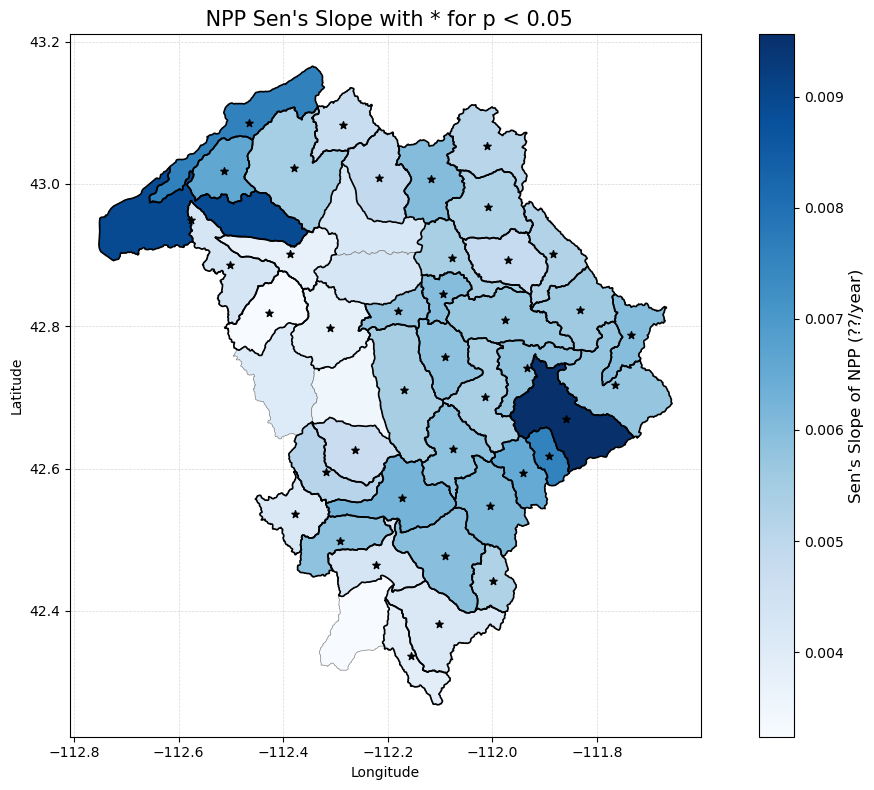

In [33]:
trend_sen.plot_trend_map(
    gdf=merged_gdf,
    slope_col=f'mean_slope',
    pval_col=f'mean_p',
    title=f" NPP Sen's Slope with * for p < 0.05",
    cbar_label=f"Sen's Slope of NPP (??/year)",
    vmin=None,
    vmax=None,
    cmap= 'RdBu',
    center_zero=True,
    show_significance_border=True,
    show_significance_marker=True,
    basemap=False,
    save_path= None # f'graphics/ca_pp_trend_map.png',
)

In [34]:
df_lt = df.groupby('huc12')[['mean']].mean().reset_index()

In [35]:
df_lt['huc12'] = df_lt['huc12'].astype(str)
# Merge the long-term statistics with the HUC12 GeoDataFrame (huc12_gdf)
huc12_gdf = gdf.merge(df_lt, on='huc12', how='left')

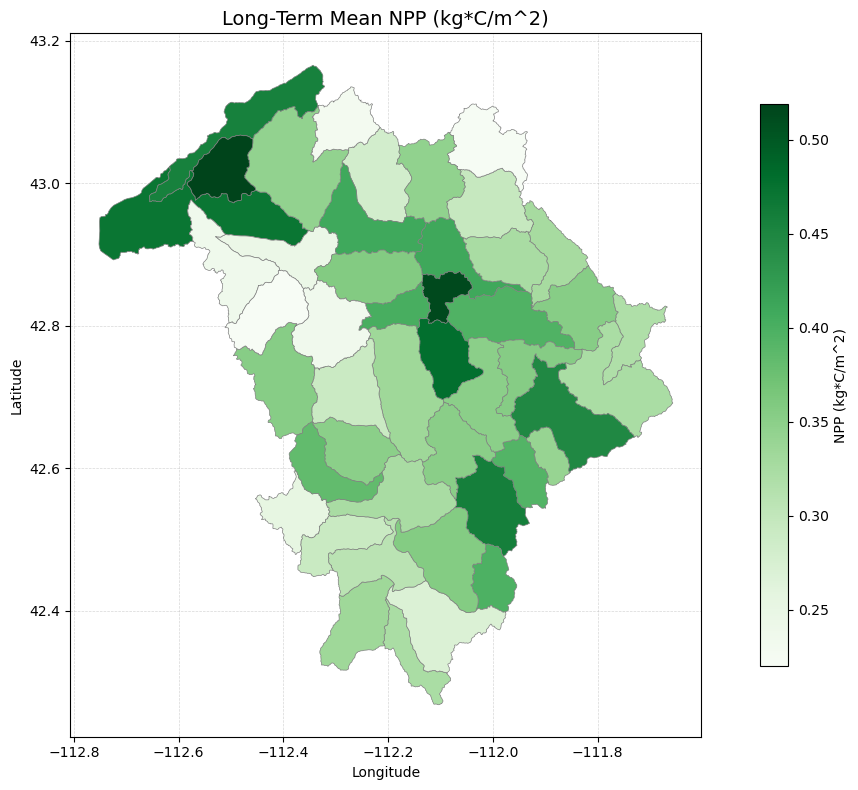

In [36]:
trend_sen.plot_gdf(
    huc12_gdf,
    column='mean',
    cmap='Greens',
    legend_label='NPP (kg*C/m^2)',
    figsize=(12, 8),
    basemap=False,
    save_path=None,#'graphics/long_term_cl_huc12.png', #'ppt_mean_map.png',
    title='Long‑Term Mean NPP (kg*C/m^2)'
)
